## IMPLEMENTATION OF Q LEARNING AND SARSA ON TAXI V-3 ENVIRONMENT

In [1]:
from taxi import TaxiEnv

In [2]:
import numpy as np# Import NumPy library for numerical computations
import gym # Import gym library for accessing the environments
import time # Import time library for time-related functions
from IPython import display  # IPython library for interactive computing
from matplotlib import pyplot as plt  # Matplotlib library for data visualization
%matplotlib inline

In [3]:
# Initialize the environment
env = gym.make("Taxi-v3")


In [4]:
env.reset()# Reset the environment and get the initial observation

71

In [5]:
img=env.render(mode="rgb_array") # Render the environment and capture the rendered image as a numpy array

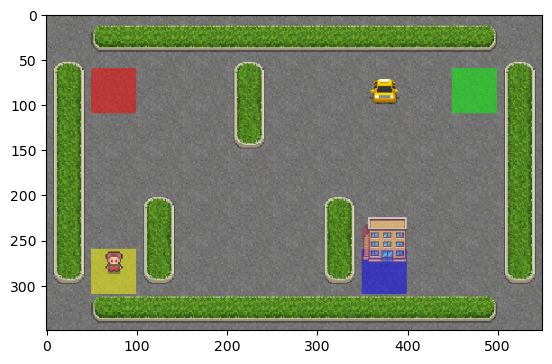

In [6]:
plt.imshow(img)
plt.show()

In [17]:
def test_env(env: gym.Env) -> None:
     # Reset the environment
    env.reset()
    
    # Initializing variables
    done = False
    
    # Displaying initial environment state
    img = plt.imshow(env.render(mode='rgb_array'))
    
    # Loop until episode termination
    while not done:
        # Selecting a random action
        action = env.action_space.sample()
        
        # Taking a step in the environment
        obs, reward, done, info = env.step(action)
        
        # Updating the displayed image
        img.set_data(env.render(mode='rgb_array'))
        
        # Displaying the updated image
        display.display(plt.gcf())
        
        # the previous display will be cleared
        display.clear_output(wait=True)

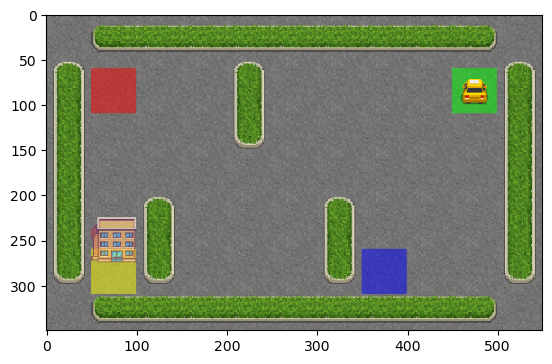

In [18]:
test_env(env)
env.close()

In [19]:
# Initialize Q-table with zeros
action_size = env.action_space.n
state_size = env.observation_space.n
q_table = np.zeros((state_size, action_size))

In [20]:
# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy policy parameter


### Q LEARNING ALGORITHM

In [21]:
# Epsilon-greedy policy
def epsilon_greedy_policy(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore action space
    else:
        return np.argmax(q_table[state, :])  # Exploit learned values

# Q-learning algorithm
def q_learning(num_episodes):
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        
        while not done:
            action = epsilon_greedy_policy(state)
            next_state, reward, done, _ = env.step(action)
            # Q-table update
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action])
            state = next_state

# Train the agent
num_episodes = 5000
q_learning(num_episodes)


In [24]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.98456861, -2.03906471, -2.80802277, -1.57915218,  1.62261467,
        -6.56439021],
       [ 1.07497568,  1.98255582, -0.59443019,  1.50384018,  7.7147    ,
        -3.41516778],
       ...,
       [-1.13615128,  3.1292448 , -1.13615128, -1.15520783, -1.99      ,
        -2.77924119],
       [-2.52770687, -2.52190117, -2.521985  ,  0.33352947, -3.71563044,
        -3.72940715],
       [-0.199     ,  0.97181461, -0.199     , 13.91997375, -1.        ,
        -1.        ]])

In [22]:
# Test the agent
episode_rewards_q = []
def test_q_learning_agent(env: gym.Env, q_table: np.ndarray, total_test_episodes: int) -> None:
    global episode_rewards_q 

    # Test the trained agent
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_reward = 0

        print("***** Test Episode {} *****".format(episode + 1))
        time.sleep(1)

        # Displaying initial environment state
        img = plt.imshow(env.render(mode='rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())

        while not done:
            # Choose the action with the highest Q-value
            action = np.argmax(q_table[state, :])

            # Take action and observe the outcome
            new_state, reward, done, info = env.step(action)

            # Update total reward
            total_reward += reward

            # Render the environment
            img.set_data(env.render(mode='rgb_array'))
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)

            # Move to the next state
            state = new_state

            # If the episode is finished, break the loop
            if done:
                break

        # total reward for the episode and append to episode_rewards
        episode_rewards_q.append(total_reward)
        time.sleep(2)

    # Compute and print average reward
    avg_reward = np.mean(episode_rewards_q)
    print("Average reward over {} episodes: {}".format(total_test_episodes, avg_reward))

    # Print all episode-wise rewards
    for i, reward in enumerate(episode_rewards_q, start=1):
        print("Reward for episode", i, "is:", reward)

    # Close the environment
    env.close()

# Example usage:
#test_q_learning_agent(env, Q, 4)

Average reward over 4 episodes: 7.0
Reward for episode 1 is: 7
Reward for episode 2 is: 9
Reward for episode 3 is: 9
Reward for episode 4 is: 3


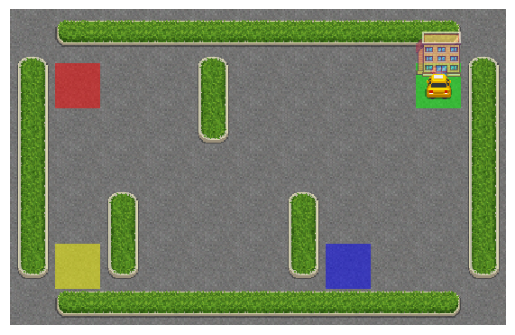

In [23]:
test_q_learning_agent(env, q_table, 4)#trained on 5000 episodes

### SARSA ALGORITHM

In [14]:
def epsilon_greedy_policy(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore action space
    else:
        return np.argmax(q_table[state, :])  # Exploit learned values

# SARSA algorithm
def sarsa(num_episodes):
    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(state)
        done = False
        
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = epsilon_greedy_policy(next_state)
            # Update Q-table
            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])
            state = next_state
            action = next_action

# Train the agent
num_episodes = 5000
sarsa(num_episodes)


In [15]:
# Test the agent
episode_rewards_sarsa = []
def test_sarsa_agent(env: gym.Env, q_table: np.ndarray, total_test_episodes: int) -> None:
    
    global episode_rewards_sarsa
    # Test the trained agent
    for episode in range(total_test_episodes):
        state = env.reset()
        step = 0
        done = False
        total_reward = 0

        print("***** Test Episode {} *****".format(episode + 1))
        time.sleep(1)

        # Displaying initial environment state
        img = plt.imshow(env.render(mode='rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())

        while not done:
            # Choose the action with the highest Q-value
            action = np.argmax(q_table[state, :])

            # Take action and observe the outcome
            new_state, reward, done, info = env.step(action)

            # Update total reward
            total_reward += reward

            # Render the environment
            img.set_data(env.render(mode='rgb_array'))
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)

            # Move to the next state
            state = new_state

            # If the episode is finished, break the loop
            if done:
                break

        # total reward for the episode and append to episode_rewards
        episode_rewards_sarsa.append(total_reward)
        time.sleep(2)

    # Compute and print average reward
    avg_reward = np.mean(episode_rewards_sarsa)
    print("Average reward over {} episodes: {}".format(total_test_episodes, avg_reward))

    # Print all episode-wise rewards
    for i, reward in enumerate(episode_rewards_sarsa, start=1):
        print("Reward for episode", i, "is:", reward)

    # Close the environment
    env.close()

# Example usage:
#test_sarsa_agent(env, Q, 4)

Average reward over 4 episodes: -43.25
Reward for episode 1 is: 6
Reward for episode 2 is: 9
Reward for episode 3 is: -200
Reward for episode 4 is: 12


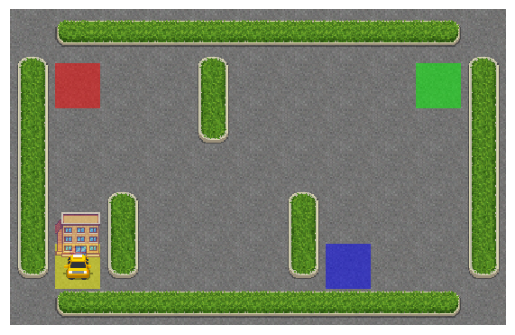

In [16]:
test_sarsa_agent(env, q_table, 4)#trained on 5000 episodes

In [22]:
import matplotlib.pyplot as plt

def plot_episode_rewards(episode_rewards_q, episode_rewards_sarsa):
    plt.plot(episode_rewards_q, label='Q-learning')
    plt.plot(episode_rewards_sarsa, label='SARSA')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Episode-wise Rewards Comparison')
    plt.legend()
    plt.show()


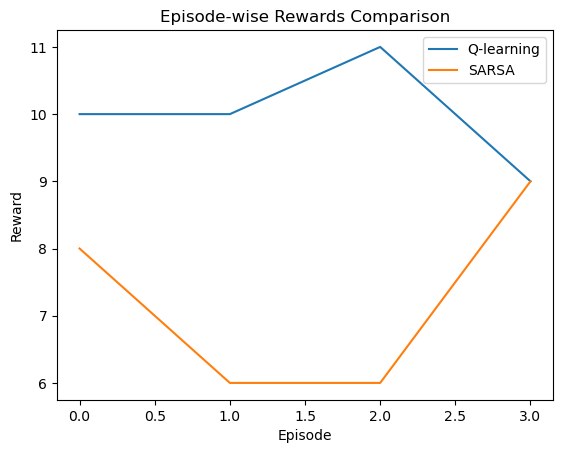

In [24]:
plot_episode_rewards(episode_rewards_q, episode_rewards_sarsa)